In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
filename = "degrees-that-pay-back.csv"
majors_df = pd.read_csv(filename)
# Replace unwanted characters that will stop conversion to float
majors_df["Starting Median Salary"] = majors_df["Starting Median Salary"].str.replace("$", "", regex=True).replace(",", "", regex=True)
majors_df["Mid-Career Median Salary"] = majors_df["Mid-Career Median Salary"].str.replace("$", "", regex=True).replace(",", "", regex=True)
majors_df["Mid-Career 10th Percentile Salary"] = majors_df["Mid-Career 10th Percentile Salary"].str.replace("$", "", regex=True).replace(",", "", regex=True)
majors_df["Mid-Career 25th Percentile Salary"] = majors_df["Mid-Career 25th Percentile Salary"].str.replace("$", "", regex=True).replace(",", "", regex=True)
majors_df["Mid-Career 75th Percentile Salary"] = majors_df["Mid-Career 75th Percentile Salary"].str.replace("$", "", regex=True).replace(",", "", regex=True)
majors_df["Mid-Career 90th Percentile Salary"] = majors_df["Mid-Career 90th Percentile Salary"].str.replace("$", "", regex=True).replace(",", "", regex=True)
majors_df.iloc[:, 1:] = majors_df.iloc[:, 1:].astype("float64", errors="ignore")
majors_df

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0
5,Art History,35800.0,64900.0,81.3,28800.0,42200.0,87400.0,125000.0
6,Biology,38800.0,64800.0,67.0,36900.0,47400.0,94500.0,135000.0
7,Business Management,43000.0,72100.0,67.7,38800.0,51500.0,102000.0,147000.0
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
9,Chemistry,42600.0,79900.0,87.6,45300.0,60700.0,108000.0,148000.0


In [3]:
filename = "salaries-by-college-type.csv"
type_df = pd.read_csv(filename)
type_df = type_df.astype("string")
type_df = type_df.replace(",", "", regex=True)
# Replace unwanted characters, for some reason can't join two ".replace" fuctions in one line for this one
type_df["Starting Median Salary"] = type_df["Starting Median Salary"].str.replace("$", "", regex=True)
type_df["Starting Median Salary"] = type_df["Starting Median Salary"].str.replace(",", "", regex=True)
type_df["Mid-Career Median Salary"] = type_df["Mid-Career Median Salary"].str.replace("$", "", regex=True)
type_df["Mid-Career Median Salary"] = type_df["Mid-Career Median Salary"].str.replace(",", "", regex=True)
type_df["Mid-Career 10th Percentile Salary"] = type_df["Mid-Career 10th Percentile Salary"].str.replace("$", "", regex=True)
type_df["Mid-Career 10th Percentile Salary"] = type_df["Mid-Career 10th Percentile Salary"].str.replace(",", "", regex=True)
type_df["Mid-Career 25th Percentile Salary"] = type_df["Mid-Career 25th Percentile Salary"].str.replace("$", "", regex=True)
type_df["Mid-Career 25th Percentile Salary"] = type_df["Mid-Career 25th Percentile Salary"].str.replace(",", "", regex=True)
type_df["Mid-Career 75th Percentile Salary"] = type_df["Mid-Career 75th Percentile Salary"].str.replace("$", "", regex=True)
type_df["Mid-Career 75th Percentile Salary"] = type_df["Mid-Career 75th Percentile Salary"].str.replace(",", "", regex=True)
type_df["Mid-Career 90th Percentile Salary"] = type_df["Mid-Career 90th Percentile Salary"].str.replace("$", "", regex=True)
type_df["Mid-Career 90th Percentile Salary"] = type_df["Mid-Career 90th Percentile Salary"].str.replace(",", "", regex=True)
type_df.iloc[:, 1:] = type_df.iloc[:, 1:].astype("float64", errors="ignore")

In [4]:
filename = "salaries-by-region.csv"
region_df = pd.read_csv(filename)
region_df = region_df.astype("string")
# Replace unwanted characters, for some reason can't join two ".replace" fuctions in one line for this one
region_df["Starting Median Salary"] = region_df["Starting Median Salary"].str.replace("$", "", regex=True)
region_df["Starting Median Salary"] = region_df["Starting Median Salary"].str.replace(",", "", regex=True)
region_df["Mid-Career Median Salary"] = region_df["Mid-Career Median Salary"].str.replace("$", "", regex=True)
region_df["Mid-Career Median Salary"] = region_df["Mid-Career Median Salary"].str.replace(",", "", regex=True)
region_df["Mid-Career 10th Percentile Salary"] = region_df["Mid-Career 10th Percentile Salary"].str.replace("$", "", regex=True)
region_df["Mid-Career 10th Percentile Salary"] = region_df["Mid-Career 10th Percentile Salary"].str.replace(",", "", regex=True)
region_df["Mid-Career 25th Percentile Salary"] = region_df["Mid-Career 25th Percentile Salary"].str.replace("$", "", regex=True)
region_df["Mid-Career 25th Percentile Salary"] = region_df["Mid-Career 25th Percentile Salary"].str.replace(",", "", regex=True)
region_df["Mid-Career 75th Percentile Salary"] = region_df["Mid-Career 75th Percentile Salary"].str.replace("$", "", regex=True)
region_df["Mid-Career 75th Percentile Salary"] = region_df["Mid-Career 75th Percentile Salary"].str.replace(",", "", regex=True)
region_df["Mid-Career 90th Percentile Salary"] = region_df["Mid-Career 90th Percentile Salary"].str.replace("$", "", regex=True)
region_df["Mid-Career 90th Percentile Salary"] = region_df["Mid-Career 90th Percentile Salary"].str.replace(",", "", regex=True)
region_df.iloc[:, 1:] = region_df.iloc[:, 1:].astype("float64", errors="ignore")

In [5]:
# See which rows are missing 3 or more values so they can be dropped
type_df.isnull().sum(axis=1).sort_values(ascending = False)

47     2
74     2
70     2
69     2
31     2
      ..
118    0
119    0
120    0
121    0
268    0
Length: 269, dtype: int64

In [6]:
region_df.isnull().sum(axis=1).sort_values(ascending = False)

104    2
25     2
27     2
227    2
249    2
      ..
117    0
116    0
115    0
114    0
319    0
Length: 320, dtype: int64

No rows need to be deleted as none are missing 50% (3) or more values

In [7]:
# For each column, fillna with mean of row's college type
type_df = type_df.fillna(type_df.groupby("School Type").transform("mean"))
type_df

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.000000,99200.0,168000.0,220000.000000
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,61793.333333,104000.0,161000.0,173333.333333
2,Harvey Mudd College,Engineering,71800.0,122000.0,61793.333333,96000.0,180000.0,173333.333333
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.000000,94300.0,143000.0,190000.000000
4,Cooper Union,Engineering,62200.0,114000.0,61793.333333,80200.0,142000.0,173333.333333
...,...,...,...,...,...,...,...,...
264,Austin Peay State University,State,37700.0,59200.0,32200.000000,40500.0,73900.0,96200.000000
265,Pittsburg State University,State,40400.0,58200.0,25600.000000,46000.0,84600.0,117000.000000
266,Southern Utah University,State,41900.0,56500.0,30700.000000,39700.0,78400.0,116000.000000
267,Montana State University - Billings,State,37900.0,50600.0,22600.000000,31800.0,78500.0,98900.000000


In [8]:
# For each column, fillna with mean of row's region
region_df = region_df.fillna(region_df.groupby("Region").transform("mean"))
region_df

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.000000,93100.0,184000.0,257000.000000
1,California Institute of Technology (CIT),California,75500.0,123000.0,47777.272727,104000.0,161000.0,167909.090909
2,Harvey Mudd College,California,71800.0,122000.0,47777.272727,96000.0,180000.0,167909.090909
3,"University of California, Berkeley",California,59900.0,112000.0,59500.000000,81000.0,149000.0,201000.000000
4,Occidental College,California,51900.0,105000.0,47777.272727,54800.0,157000.0,167909.090909
...,...,...,...,...,...,...,...,...
315,State University of New York (SUNY) at Potsdam,Northeastern,38000.0,70300.0,35100.000000,51200.0,100000.0,179000.000000
316,Niagara University,Northeastern,36900.0,69700.0,44000.000000,57000.0,92000.0,128000.000000
317,State University of New York (SUNY) at Fredonia,Northeastern,37800.0,66200.0,32800.000000,44200.0,93300.0,181000.000000
318,University of Southern Maine,Northeastern,39400.0,63600.0,40400.000000,47900.0,85700.0,117000.000000


Text(0.5, 1.0, 'Accuracy for different K values')

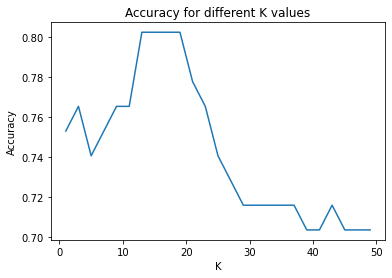

In [9]:
# k-NN for school type
X = type_df.iloc[:, 2:7]
y = type_df.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(
                                    # train-test split of 70-30
                                    X, y, test_size = 0.3, random_state=1, stratify=y)


k_list = [i for i in range(1, 50, 2)]
scores = []

# Get best k-value
for k in k_list:
    # Change number of neighbors, 1-50 increasing in increments of 2
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    # Save accuracy score for each k-value
    score = knn.score(X_test, y_test)
    scores.append(score)
    
plt.plot(k_list, scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy for different K values")

Highest accuracy are between (approx.) k-values 14-20. 17 will be used as it is the median.

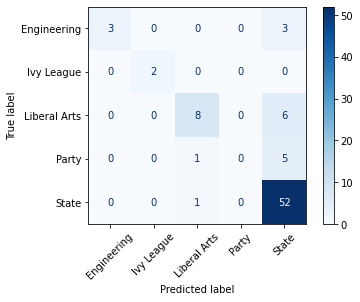

In [10]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
y_pred = knn.predict(X_test)
# Initialize confusion matrix
cm = confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

In [11]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

 Engineering       1.00      0.50      0.67         6
  Ivy League       1.00      1.00      1.00         2
Liberal Arts       0.80      0.57      0.67        14
       Party       0.00      0.00      0.00         6
       State       0.79      0.98      0.87        53

    accuracy                           0.80        81
   macro avg       0.72      0.61      0.64        81
weighted avg       0.75      0.80      0.76        81



C:\Users\budde\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\budde\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\budde\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.3020833333333333, 0.34375, 0.3645833333333333, 0.3333333333333333, 0.3854166666666667, 0.3229166666666667, 0.3125, 0.3125, 0.2916666666666667, 0.3333333333333333, 0.3333333333333333, 0.3020833333333333, 0.3333333333333333, 0.3125, 0.3020833333333333, 0.3125, 0.34375, 0.3229166666666667, 0.3229166666666667, 0.3125, 0.3541666666666667, 0.3229166666666667, 0.3333333333333333, 0.3541666666666667, 0.3333333333333333]


Text(0.5, 1.0, 'Accuracy for different K values')

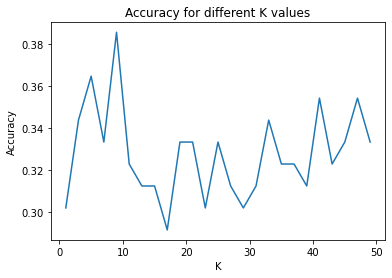

In [12]:
#k-NN for region
X = region_df.iloc[:, 2:7]
y = region_df.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(
                                    # train-test split of 70-30
                                    X, y, test_size = 0.3, random_state=1, stratify=y)


k_list = [i for i in range(1, 50, 2)]
scores = []

# Get best k-value
for k in k_list:
    # Change number of neighbors, 1-50 increasing in increments of 2
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    # Save accuracy score for each k-value
    score = knn.score(X_test, y_test)
    scores.append(score)

print(scores)
plt.plot(k_list, scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy for different K values")

Highest accuracy for k-value of 9

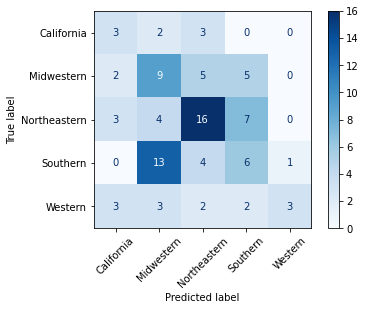

In [13]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
y_pred = knn.predict(X_test)
# Initialize confusion matrix
cm = confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

In [14]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

  California       0.27      0.38      0.32         8
  Midwestern       0.29      0.43      0.35        21
Northeastern       0.53      0.53      0.53        30
    Southern       0.30      0.25      0.27        24
     Western       0.75      0.23      0.35        13

    accuracy                           0.39        96
   macro avg       0.43      0.36      0.36        96
weighted avg       0.43      0.39      0.38        96



In [15]:
# Set X to major-specific starting median salary for linear regression
X = majors_df.iloc[:, 1].values.reshape(-1, 1)
# y is mid-career median salary
y = majors_df.iloc[:, 2].values.reshape(-1, 1)

lr = LinearRegression().fit(X, y)
# Coefficient of Determination
r_sq = lr.score(X, y)

# Get intercept and slope of model
intercept = lr.intercept_
slope = lr.coef_

print("R-squared for starting median salary vs. mid-career median salary for majors: ", round(r_sq, 2))

R-squared for starting median salary vs. mid-career median salary for majors:  0.72


Text(0, 0.5, 'Mid-Career Median Salary')

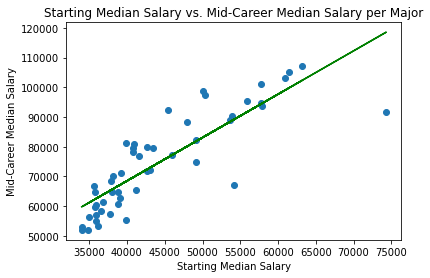

In [16]:
plt.scatter(X, y)
# Plot line of best fit
plt.plot(X, slope*X+intercept, color="green")
plt.title("Starting Median Salary vs. Mid-Career Median Salary per Major")
plt.xlabel("Starting Median Salary")
plt.ylabel("Mid-Career Median Salary")

In [17]:
X = majors_df.iloc[:, [1, 2, 4, 5, 6, 7]]

In [18]:
kmean = KMeans(n_clusters = 3, random_state = 5)
kmean.fit(X)
label = kmean.fit_predict(X)

majors_df["Label"] = label
label_0 = majors_df[label == 0]
label_1 = majors_df[label == 1]
label_2 = majors_df[label == 2]

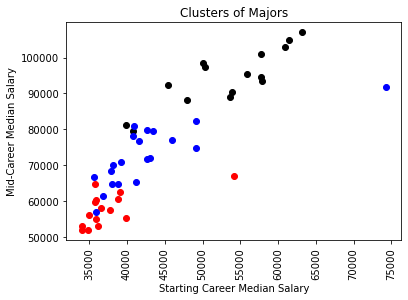

In [19]:
cols = label_0.columns
# Compare starting career median salary to mid-career median salary
plt.scatter(label_0[cols[1]], label_0[cols[2]], color = 'red')
plt.scatter(label_1[cols[1]], label_1[cols[2]], color = 'black')
plt.scatter(label_2[cols[1]], label_2[cols[2]], color = 'blue')
plt.xticks(rotation=90)
plt.title("Clusters of Majors")
plt.xlabel("Starting Career Median Salary")
plt.ylabel("Mid-Career Median Salary")
plt.show()

Text(0, 0.5, 'Mid-Career 25th Percentile Salary')

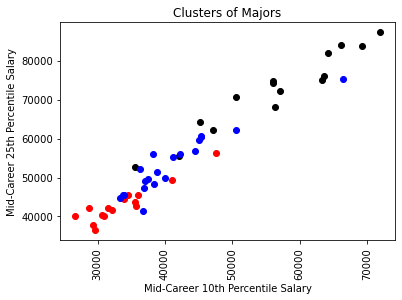

In [20]:
plt.scatter(label_0[cols[4]], label_0[cols[5]], color = 'red')
plt.scatter(label_1[cols[4]], label_1[cols[5]], color = 'black')
plt.scatter(label_2[cols[4]], label_2[cols[5]], color = 'blue')
plt.xticks(rotation=90)
plt.title("Clusters of Majors")
plt.xlabel("Mid-Career 10th Percentile Salary")
plt.ylabel("Mid-Career 25th Percentile Salary")

Text(0, 0.5, 'Mid-Career 90th Percentile Salary')

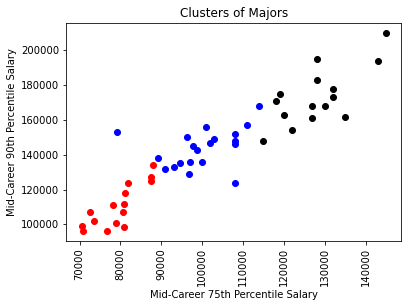

In [21]:
plt.scatter(label_0[cols[6]], label_0[cols[7]], color = 'red')
plt.scatter(label_1[cols[6]], label_1[cols[7]], color = 'black')
plt.scatter(label_2[cols[6]], label_2[cols[7]], color = 'blue')
plt.xticks(rotation=90)
plt.title("Clusters of Majors")
plt.xlabel("Mid-Career 75th Percentile Salary")
plt.ylabel("Mid-Career 90th Percentile Salary")

Clusters seem to be most defined/separated in the upper tiers of salary, i.e. 75th and 90th percentiles.

In [22]:
print(label_0["Undergraduate Major"])

5                    Art History
15              Criminal Justice
18                     Education
23                      Forestry
26                Graphic Design
27    Health Care Administration
29         Hospitality & Tourism
32               Interior Design
39                         Music
40                       Nursing
41                     Nutrition
46                    Psychology
47                      Religion
48                     Sociology
49                       Spanish
Name: Undergraduate Major, dtype: object


In [23]:
print(label_1["Undergraduate Major"])

1      Aerospace Engineering
8       Chemical Engineering
10         Civil Engineering
12      Computer Engineering
13          Computer Science
14              Construction
17                 Economics
19    Electrical Engineering
22                   Finance
30    Industrial Engineering
36                 Marketing
37                      Math
38    Mechanical Engineering
42                Philosophy
44                   Physics
Name: Undergraduate Major, dtype: object


In [24]:
print(label_2["Undergraduate Major"])

0                               Accounting
2                              Agriculture
3                             Anthropology
4                             Architecture
6                                  Biology
7                      Business Management
9                                Chemistry
11                          Communications
16                                   Drama
20                                 English
21                                    Film
24                               Geography
25                                 Geology
28                                 History
31             Information Technology (IT)
33                 International Relations
34                              Journalism
35    Management Information Systems (MIS)
43                     Physician Assistant
45                       Political Science
Name: Undergraduate Major, dtype: object
